### 1-1. 머신러닝

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("student_data.csv")
data

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


<BarContainer object of 19 artists>

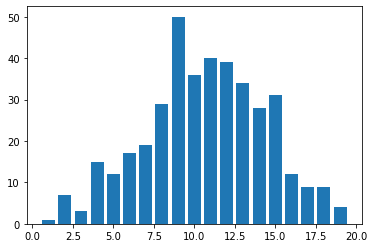

In [2]:
import matplotlib.pyplot as plt
plt.bar(data['grade'].value_counts().index, data['grade'].value_counts().values)

<AxesSubplot:>

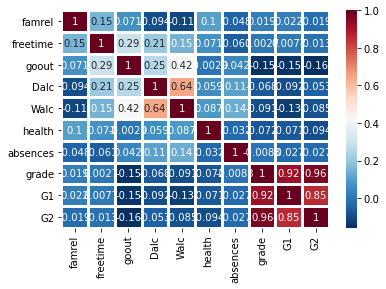

In [3]:
import seaborn as sns
df_cor=data.corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True, linewidth=3)

G1,G2가 y변수와 상관관계가 높다.

In [4]:
data.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [5]:
from sklearn.impute import KNNImputer

KNN_data=data.drop(columns=['school', 'sex', 'paid', 'activities'])

imputer=KNNImputer()
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
data[KNN_data.columns]=df_filled

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    float64
 12  G1          395 non-null    float64
 13  G2          395 non-null    float64
dtypes: float64(10), object(4)
memory usage: 43.3+ KB


In [7]:
data=pd.get_dummies(data, drop_first=True)

In [8]:
data

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,1,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=['grade'])
y=data['grade']

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 13)
(119, 13)
(276,)
(119,)


In [13]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [14]:
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

from sklearn.model_selection import GridSearchCV
param_grid=[{'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10]}]
grid_svm=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
result=pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score']=grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.964169
11,10.0,0.010,0.959437
16,100.0,0.010,0.951701
10,10.0,0.001,0.942709
6,1.0,0.010,0.920341
12,10.0,0.100,0.873728
17,100.0,0.100,0.863269
7,1.0,0.100,0.798050
5,1.0,0.001,0.301072
2,0.1,0.100,0.275776


In [34]:
svr=SVR(C=100, gamma=0.001)
svr.fit(X_train_scaled, y_train)

print("R2 : ", svr.score(X_test_scaled, y_test))
print("RMSE :", np.sqrt(mean_squared_error(y_test, svr.predict(X_test_scaled))))

R2 :  0.9552154793963614
RMSE : 0.8351919256537519


In [22]:
rf_grid=[{'max_depth':[2,4,5,8,10], 'min_samples_split':[2,4,6,8,10]}]
rf=GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 5, 8, 10],
                          'min_samples_split': [2, 4, 6, 8, 10]}])

In [26]:
rf.best_params_
rf=RandomForestRegressor(max_depth=8, min_samples_split=6, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=6)

In [28]:
pred=rf.predict(X_test)
print(rf.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.9666457431349045
0.7207720822730207


In [29]:
xgb_grid=[{'max_depth':[2,4,6,8,10]}]
xgb=GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10]}])

In [32]:
xgb.best_params_

{'max_depth': 8}

In [33]:
xgb=XGBRegressor(max_depth=8)
xgb.fit(X_train, y_train)
pred=xgb.predict(X_test)

print(xgb.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.9641499955815864
0.7472517297114797


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

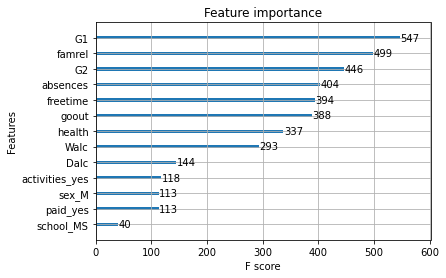

In [41]:
from xgboost import plot_importance
plot_importance(xgb)

### 2-1. 회귀분석

In [43]:
import pandas as pd
import numpy as np
import mglearn

X, y=mglearn.datasets.load_extended_boston()

C:\Users\taeeu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [54]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(lr.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

0.615885858407892
5.592657237078517


- 릿지

In [60]:
#warinng 무시
import warnings
warnings.filterwarnings('ignore')

alpha=np.arange(0, 1.1, 0.1)

ridge=Ridge(normalize=True)
param_grid={'alpha':alpha}
ridge_model=GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [61]:
ridge_model.best_params_

{'alpha': 0.1}

In [62]:
ridge=Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
pred=ridge.predict(X_test)
print(ridge.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.7356090234954484
4.6399293657141945


- 랏소

In [63]:
lasso=Lasso(normalize=True)
param_grid={'alpha':alpha}
lasso_model=GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [64]:
lasso_model.best_params_

{'alpha': 0.0}

In [65]:
lasso=Lasso(alpha=0, normalize=True)

In [66]:
lasso.fit(X_train, y_train)
pred=lasso.predict(X_test)
print(lasso.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.6901880385280231
5.022698918446969


### 1-3. anova

In [77]:
import pandas as pd
import numpy as np
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [78]:
data=data[['AveragePrice', 'type', 'region']]
data=data[(data['region']=='Orlando')|(data['region']=='Boston')|(data['region']=='Chicago')].reset_index(drop=True)
data

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


x1에 따른 averageprice 평균 간 차이가 존재하지 않는다

x1에 따른 averageprice 평균 간 차이가 존재한다.

In [79]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='AveragePrice~C(type)+C(region)+C(type):C(region)'
model=ols(formula, data).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


교호작용이 있음!

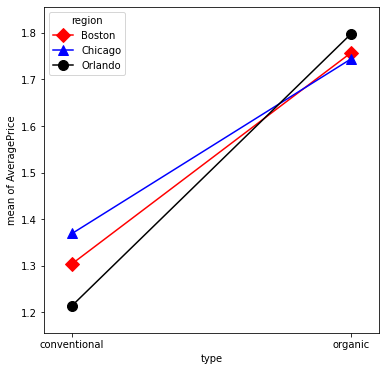

In [82]:
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

avocado_type=data['type']
region=data['region']
AveragePrice=data['AveragePrice']

fig,ax=plt.subplots(figsize=(6,6))
fig=interaction_plot(avocado_type, region, AveragePrice, colors=['red', 'blue', 'black'], markers=['D', '^', 'o'], ms=10, ax=ax)

교호작용이 나타나는 것을 확인